# Project Overview

The purpose of this project is to observe if the median income per capita is correlated with the prices in rent. We will then train and test a machine learning algorithm to observe the accuracy of rent prices. We can then predict future rent prices based on the algorithm.

This project will demonstrate data extraction, data cleaning, data analysis, data visualization, machine learning, and programming aptitude using the python programming language. Code may change, as I improve in writing a more cleaner script.

Data Sources:

Median Rental Prices by State- https://www.apartmentlist.com/rentonomics/rental-price-data/

Income per capita by state- 2019: https://fred.stlouisfed.org/release/tables?rid=151&eid=257197

Income per capita by state- 2018: https://fred.stlouisfed.org/release/tables?rid=151&eid=257197&od=2018-01-01#

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

Here, we will import the data set from a csv file, showing the average rent prices in every state by year. The data will be grouped according to the state name 'Location'.

In [41]:
house_data = pd.read_csv('Apartment_List_Rent_Data_State_2020.csv')
ByState = house_data.groupby('Location').mean()
Rent = ByState[['Price_2017_12','Price_2018_12','Price_2019_12']]
Rent.head()

,Price_2017_12,Price_2018_12,Price_2019_12
Location,,,
Alabama,868.4,886.8,905.2
Alaska,1329.0,1329.4,1325.6
Arizona,1149.6,1185.0,1226.2
Arkansas,786.4,788.2,795.2
California,1957.6,1994.6,2016.6


Since we have multi level index columns from the two scraped dataframes, we will clean the indexes by dropping the top level and concatenating into one clean dataframe.

In [95]:
data2018 = pd.read_html('https://fred.stlouisfed.org/release/tables?rid=151&eid=257197&od=2018-01-01#.html')
data2019 = pd.read_html('https://fred.stlouisfed.org/release/tables?rid=151&eid=257197')
states19 = data2019[0].xs('Unnamed: 1_level_0', axis=1, drop_level=True)
dollars19 = data2019[0].xs('Dollars', axis=1, drop_level=True)
dollars18 = data2018[0].xs('Dollars', axis=1, drop_level=True)
df19 = pd.concat([states19, dollars19], axis=1)[['Name','2019']]

df = pd.concat([df19,dollars18], axis=1)
df.rename({'Preceding Period': '2018'}, axis=1, inplace=True)
df.head()

,Name,2019,2018,Preceding Period,Year Ago from Period
0,Alabama,43880,42240,40473,40473
1,Alaska,62102,59605,56800,56800
2,Arizona,46233,44414,42534,42534
3,Arkansas,44845,43292,41543,41543
4,California,66661,63711,60219,60219


We will graph 2019 and 2018's annual income using a stacked bar chart. As expected, the most recent data is more than the previous year because of rising cost of living and inflation of prices over time.

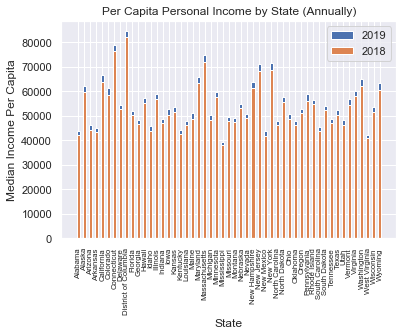

In [96]:
plt.bar(df['Name'],df['2019'],width=.5,label='2019')
plt.bar(df['Name'],df['2018'],width=.5,label='2018')
plt.xticks(size = 7.8,rotation=90)
plt.xlabel('State')
plt.ylabel('Median Income Per Capita')
plt.title('Per Capita Personal Income by State (Annually)')
plt.legend()
plt.show()

We will now train the machine learning model using ScikitLearn. Then we will evaluate the model to see if it is accurate for predicting future rent prices using the respective state's income.

In [45]:
X = df[['2019']]

In [46]:
y = Rent['Price_2019_12']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [48]:
lm = LinearRegression()

In [49]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print(lm.intercept_)

-57.24487504688068


In [51]:
lm.coef_

array([0.02237177])

In [52]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
2019,0.022372


In [53]:
predictions = lm.predict(X_test)

In [54]:
predictions

array([1127.04956115, 1031.2983817 , 1619.89967411, 1540.99443814,
       1068.50263671, 1332.08684146, 1040.62741016, 1394.6383129 ,
       1117.36258435,  889.88641783, 1138.59339494,  823.4870018 ,
       1156.73690114, 1287.65650445, 1016.77910238,  946.01719102,
       1149.15287081, 1530.68105176, 1120.31565811, 1412.20015306,
       1025.43697772])

Histogram Residuals Normally Distributed using Seaborn library

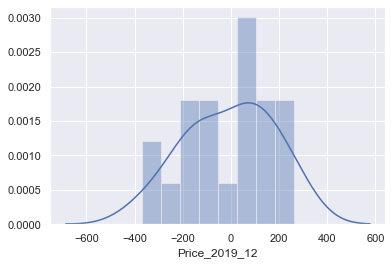

In [60]:
sns.distplot((y_test-predictions),bins=8)

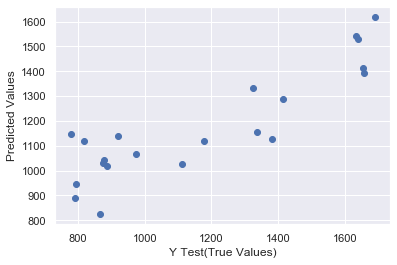

In [74]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.show()

R^2 value explains how much the variance is within the model. As we run this function, 71.69% is explained which is acceptable.

In [65]:
metrics.explained_variance_score(y_test,predictions)

0.7169065441834896